###Meskerem Goshime, Neural Networks, Renwind
###UT - Post-Graduate Program in Artificial Intelligence and Machine Learning
####December 7, 2025

# **Problem Statement**

## Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

## Objective

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description

The data provided is a transformed version of the original data which was collected using sensors.

- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.

Both the datasets consist of 40 predictor variables and 1 target variable.

# **Installing and Importing the necessary libraries**

In [ ]:
# Installing the libraries with the specified version
#!pip install --no-deps tensorflow==2.19.0 scikit-learn==1.6.1 matplotlib===3.10.0 seaborn==0.13.2 numpy==2.0.2 pandas==2.2.2 -q --user --no-warn-script-location

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

# **Loading the Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split as Train_Test_Split
import time

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Read the training data into a dataframe
Train = pd.read_csv('/content/drive/MyDrive/UTAIML_Projects/Neural_Networks_ReneWind/Train.csv')
Train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [6]:
#Read the test data into a dataframe
Test = pd.read_csv('/content/drive/MyDrive/UTAIML_Projects/Neural_Networks_ReneWind/Test.csv')
Test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


# **Data Overview**

In [7]:
#number of rows and colomuns in the training and test data
Train.shape, Test.shape

((20000, 41), (5000, 41))

# **Exploratory Data Analysis**

In [8]:
#function to create histogram
def create_histplot(data, col, figsize, title):
    plt.figure(figsize=figsize)
    plt.hist(data[col], color='skyblue', edgecolor='black')
    plt.title(title)
    palette="Paired"
    plt.show()

## Univariate analysis

In [9]:
#statistical summary of the data
Train.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


In [10]:
#number of rows for V1 and V2 is 19982 while it is 20000 for the other columns.
#They seem to have missing values.

Train['V1'].isna().sum(), Train['V2'].isna().sum()

(np.int64(18), np.int64(18))

In [11]:
#checking the distribution of the target variable
Train['Target'].value_counts(), Train['Target'].value_counts(normalize=True)

(Target
 0    18890
 1     1110
 Name: count, dtype: int64,
 Target
 0    0.9445
 1    0.0555
 Name: proportion, dtype: float64)

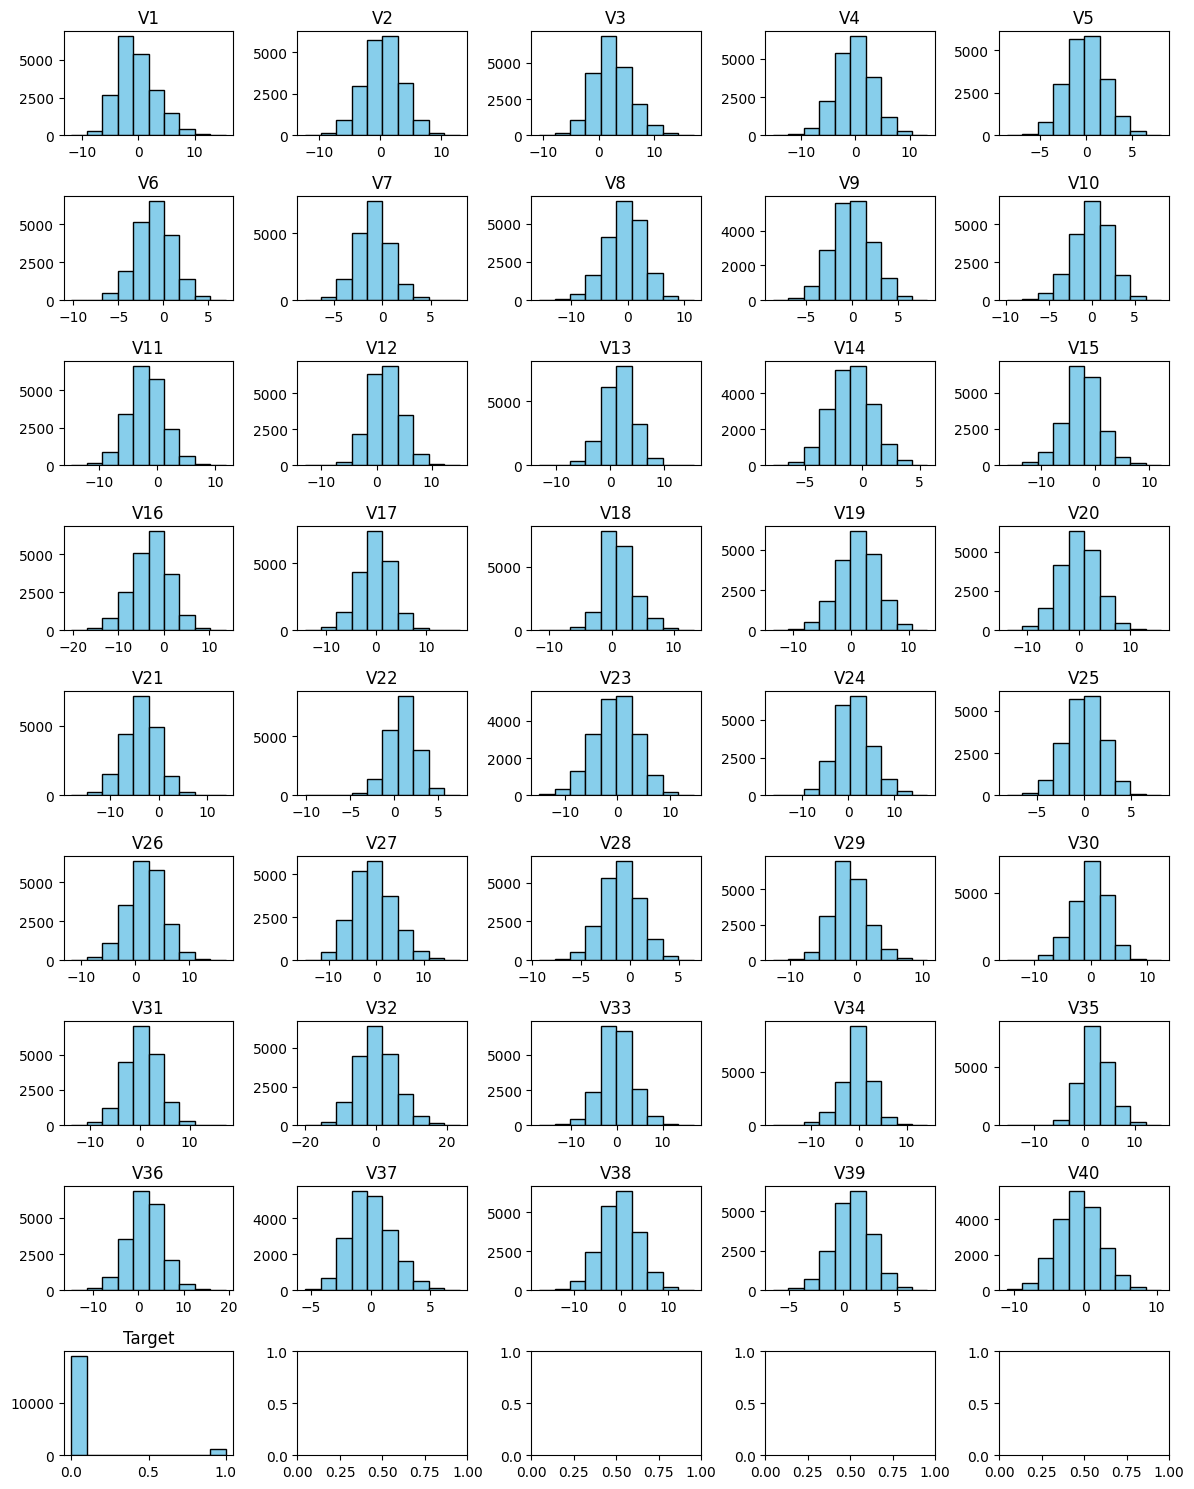

In [12]:
#creating histograms of each of the columns

n_rows = 9
n_cols = 5

# Create the figure and subplots
# The 'figsize' argument controls the overall size of the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12,15))

# Flatten the 'axes' array for easier iteration if it's multi-dimensional
axes = axes.flatten()

# Iterate through each column of the DataFrame and plot its histogram
for i, col in enumerate(Train.columns):
    axes[i].hist(Train[col], color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    pallette='Paired'

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

- The data has 40 independent variables and 1 target variable. It contains 20,000 rows in the Training set and 5,000 rows in the test set.
- All of the independent variables as well as the target variable are numerical.
- Values for the independent variables range between -20 and 24.
- The target variable is binary with values of 0 and 1.
- Columns V1 and V2 have 18 blank columns.
- Column V1 is a little bit right skewed, while V2 looks like a normal distribution.
- Most of the independent variables are normally distributed with no significant skewness.

## Bivariate Analysis

In [13]:
#checking the correlation between the independent variables
cm = Train.corr().round(2)
cm

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
V1,1.00,0.31,0.39,-0.29,-0.52,0.18,0.48,-0.36,0.40,-0.02,...,-0.63,-0.29,-0.02,0.14,-0.12,-0.35,0.15,-0.12,0.21,0.07
V2,0.31,1.00,0.10,0.29,0.38,0.23,0.46,-0.38,0.28,-0.48,...,-0.12,0.20,-0.28,-0.05,-0.58,-0.44,0.66,-0.35,0.16,-0.00
V3,0.39,0.10,1.00,-0.03,-0.36,-0.29,-0.16,-0.41,0.23,0.45,...,-0.37,-0.22,0.23,0.50,0.44,-0.50,-0.07,0.53,-0.31,-0.21
V4,-0.29,0.29,-0.03,1.00,0.08,-0.47,-0.20,0.03,0.27,-0.11,...,0.38,-0.05,0.30,0.34,-0.56,-0.36,0.09,-0.39,-0.67,0.11
V5,-0.52,0.38,-0.36,0.08,1.00,0.16,-0.08,0.17,-0.30,-0.34,...,0.62,0.46,-0.61,-0.34,-0.05,0.06,0.17,-0.22,0.34,-0.10
V6,0.18,0.23,-0.29,-0.47,0.16,1.00,0.21,-0.56,0.08,-0.12,...,-0.29,0.59,-0.40,-0.32,-0.25,-0.07,0.63,-0.03,0.42,0.00
V7,0.48,0.46,-0.16,-0.20,-0.08,0.21,1.00,0.09,-0.24,-0.18,...,-0.46,-0.27,0.23,-0.44,-0.28,-0.01,0.47,-0.24,0.48,0.24
V8,-0.36,-0.38,-0.41,0.03,0.17,-0.56,0.09,1.00,-0.61,-0.18,...,0.47,-0.25,0.05,-0.17,0.16,0.52,-0.61,-0.34,0.26,0.14
V9,0.40,0.28,0.23,0.27,-0.30,0.08,-0.24,-0.61,1.00,-0.29,...,-0.37,-0.14,-0.10,0.12,-0.35,-0.20,0.04,0.00,-0.31,0.01
V10,-0.02,-0.48,0.45,-0.11,-0.34,-0.12,-0.18,-0.18,-0.29,1.00,...,-0.02,-0.11,0.51,0.35,0.56,-0.40,-0.01,0.56,-0.47,-0.05


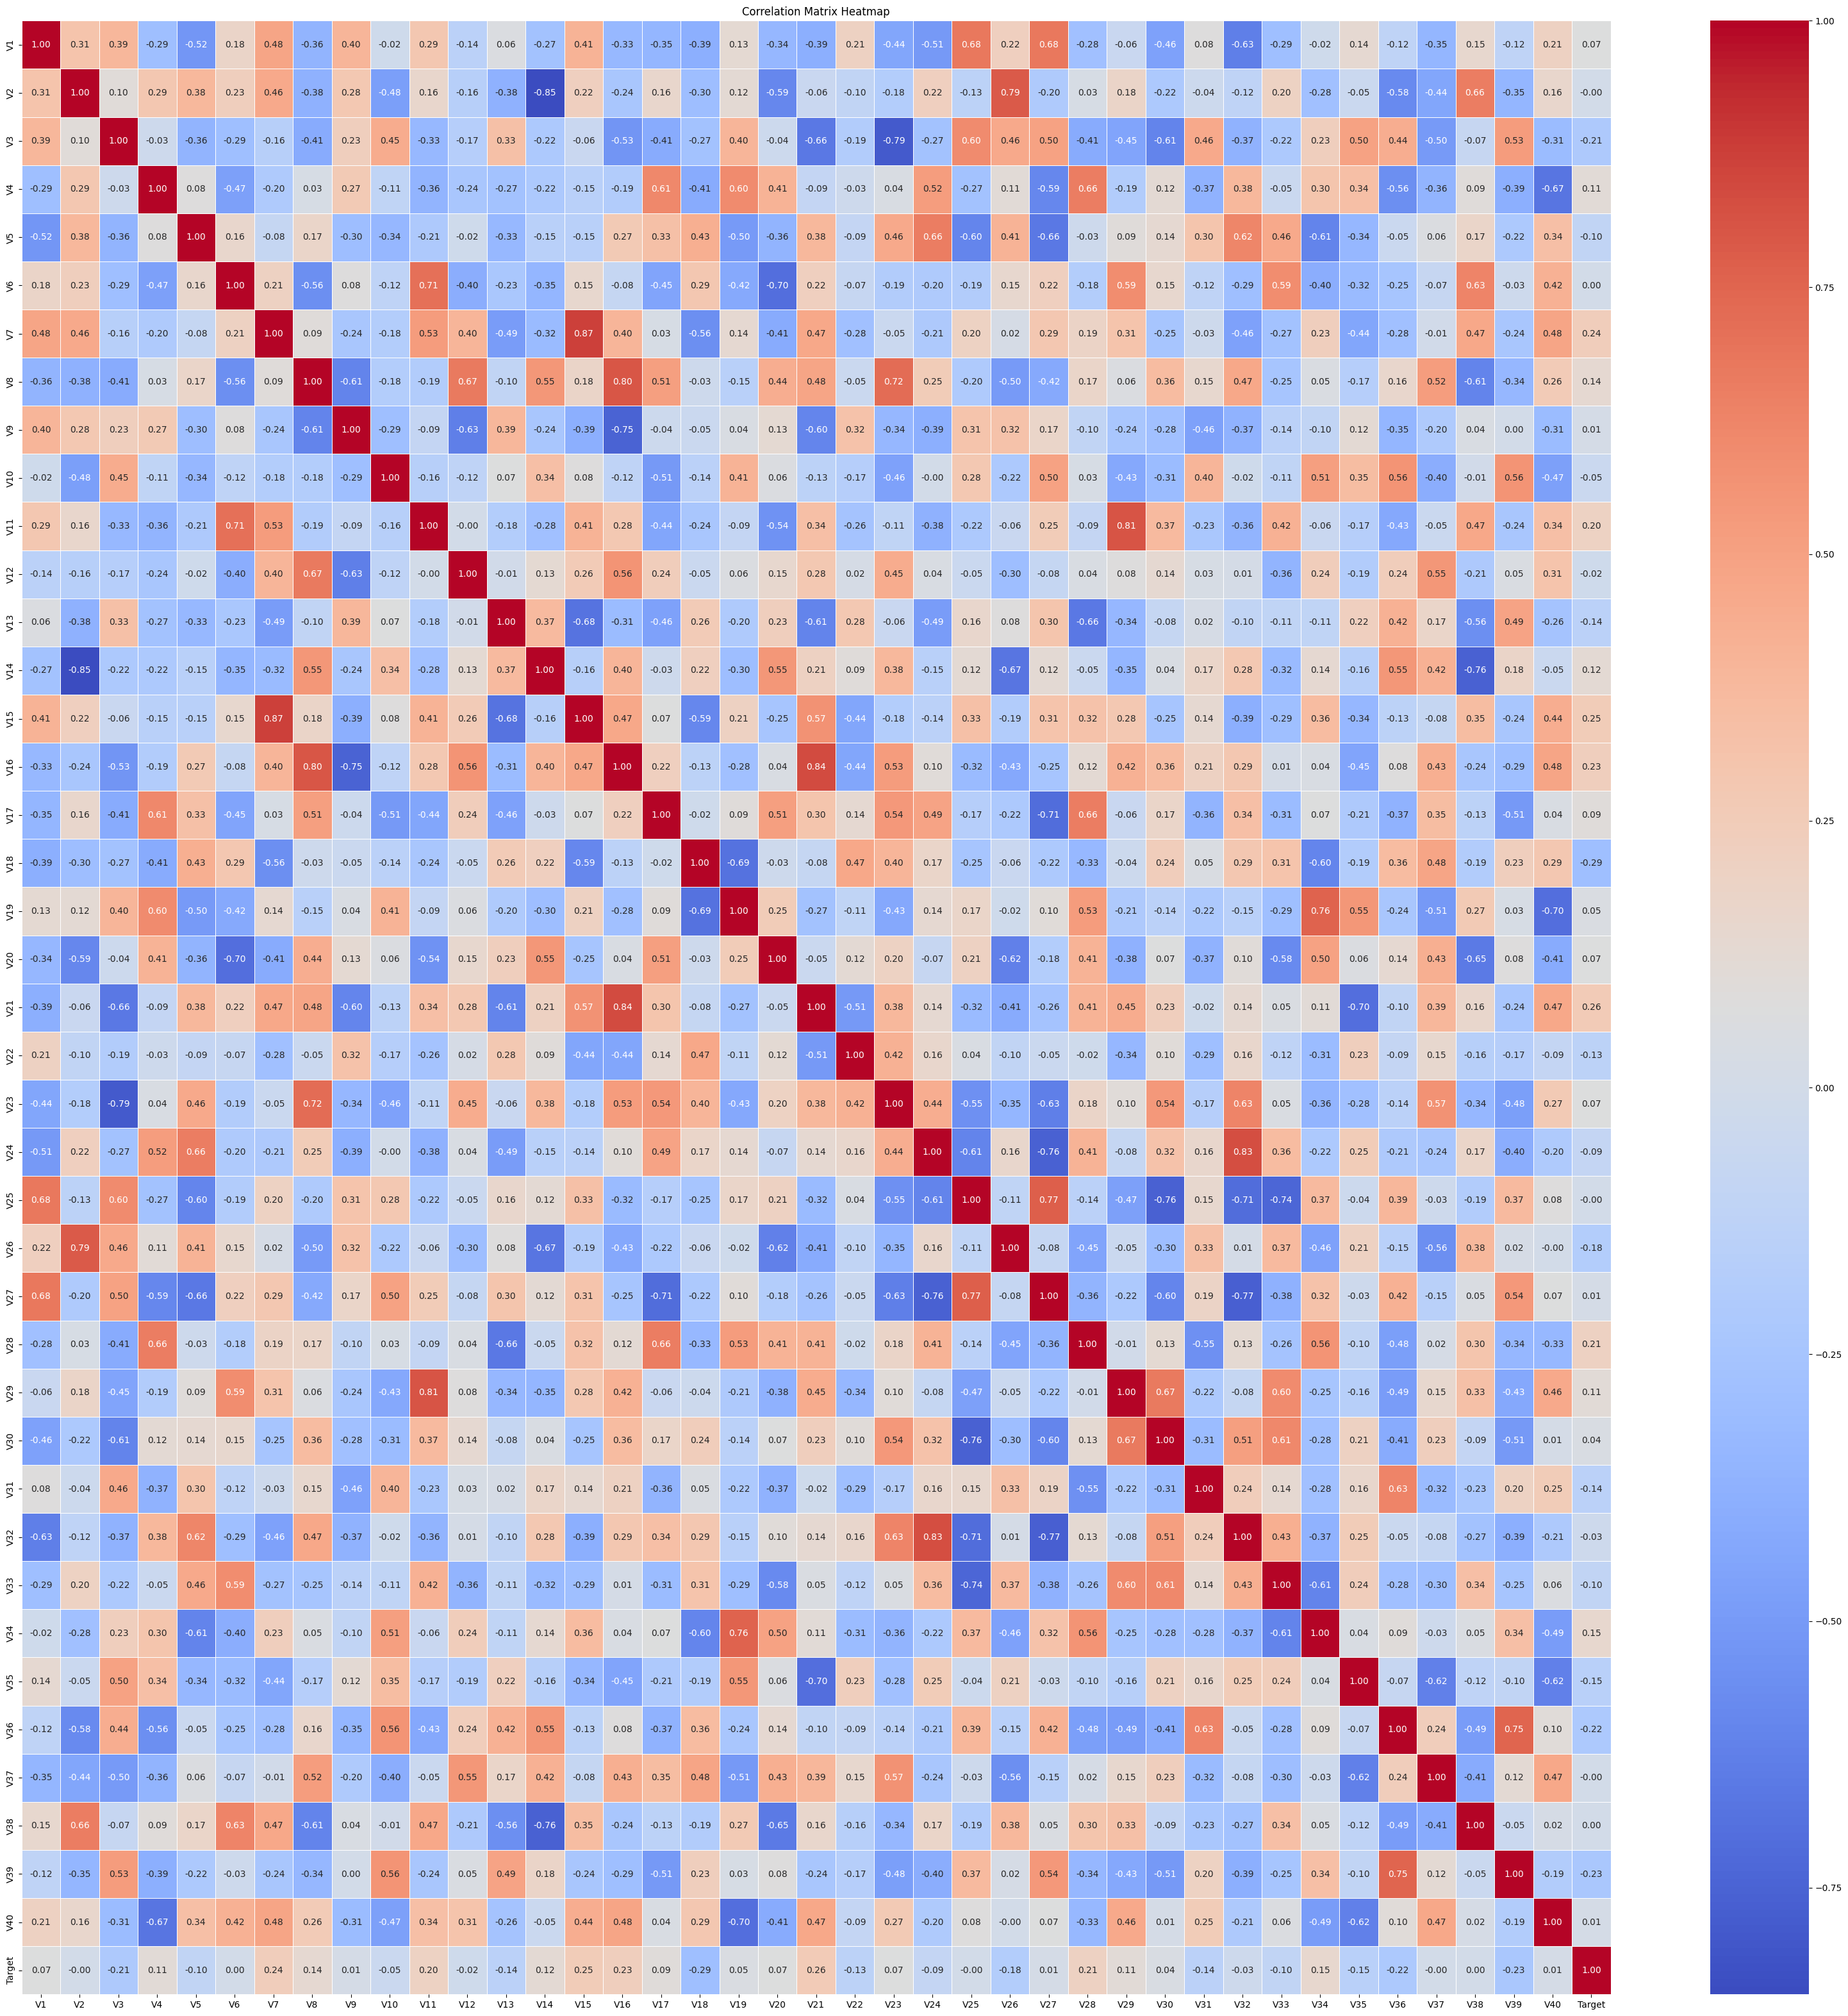

In [14]:
#plottig the correatio heatmap
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

- Some of the columns have higher correlation. For example, V7 and V15 have 87% correlation.
- However, the independent variables does not have very high correlation with the Target variable.
- Among the independent varialbes, V18 and V21 has the highest correlation with the Target variable, which is -0.29 and 0.26 respectively.

# **Data Preprocessing**

In [15]:
#missing values in the training set
missing = Train.isna().sum()
missing[missing > 0]

,0
V1,18
V2,18


In [16]:
#missing values in the test set
missing = Test.isna().sum()
missing[missing > 0]

,0
V1,5
V2,6


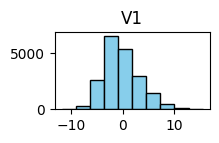

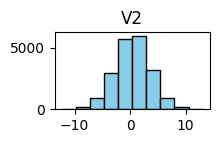

In [17]:
#checking the distribution of V1 and V2 columns to see if they have some skewness
create_histplot(data=Train, col='V1', figsize=(2,1), title='V1')
create_histplot(data=Train, col='V2', figsize=(2,1), title='V2')

In [18]:
#imputing with median value since V1 is a little bit skwed

imputer = SimpleImputer(strategy='median')

# Fit ONLY on training data to avoid data leakage
imputer.fit(Train)

# Transform both train and test
Train_imputed = imputer.transform(Train)
Test_imputed = imputer.transform(Test)

In [19]:
Train_imputed = pd.DataFrame(Train_imputed, columns=Train.columns)
Test_imputed = pd.DataFrame(Test_imputed, columns=Test.columns)

In [20]:
#separating the training data into X_train and y_train
X_train_imputed = Train_imputed.drop('Target', axis=1)
y_train_imputed = Train_imputed['Target']

In [21]:
#splitting the data into training and validation sets
X_train, X_val, y_train, y_val = Train_Test_Split(X_train_imputed, y_train_imputed, test_size=0.2, random_state=42, stratify=y_train_imputed)

In [22]:
#separating test data int X_test and y_test
X_test = Test_imputed.drop('Target', axis=1)
y_test = Test_imputed['Target']

In [23]:
#checking number of rows and columns in the training, validation and test sets
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((16000, 40), (16000,), (4000, 40), (4000,), (5000, 40), (5000,))

In [24]:
#checking the distribution of y in training, validation and test sets
y_train.value_counts(normalize=True), y_val.value_counts(normalize=True), y_test.value_counts(normalize=True)

(Target
 0.0    0.9445
 1.0    0.0555
 Name: proportion, dtype: float64,
 Target
 0.0    0.9445
 1.0    0.0555
 Name: proportion, dtype: float64,
 Target
 0.0    0.9436
 1.0    0.0564
 Name: proportion, dtype: float64)

This is a highly imbalanced dataset with 95% in the 0 (negative) class and 5% in the 1 (positive) class.

# **Model Building**

## Model Evaluation Criterion

Write down the model evaluation criterion with rationale

This is an imbalanced dataset with 95% of the data in class 0 and 5% of the data in class 1 (failure).

Our goal is identifying possible failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.

I choose recall as my model evaluation critre since I want to focus on finding actual positive cases.

##Defining Functions

In [25]:
# printing recall and accuracy values and saving them in variables
def recall_accuracy():
  train_accuracy = history.history['accuracy'][-1]
  val_accuracy = history.history['val_accuracy'][-1]
  train_recall = history.history['recall'][-1]
  val_recall = history.history['val_recall'][-1]
  print('Train Accuracy: ', train_accuracy)
  print('Validation Accuracy: ', val_accuracy)
  print('Train Recall: ', train_recall)
  print('Validation Recall: ', val_recall)
  return train_accuracy, val_accuracy, train_recall, val_recall

In [26]:
# plotting loss, accuracy or recall
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    fig.set_size_inches(4, 3) #Defining the size of the plot.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

## Initial Model Building (Model 0)

- Let's start with a neural network consisting of
  - just one hidden layer
  - activation function of ReLU
  - SGD as the optimizer

In [27]:
keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8726 - loss: 0.3378 - recall: 0.4355 - val_accuracy: 0.9625 - val_loss: 0.1321 - val_recall: 0.3874
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9697 - loss: 0.1181 - recall: 0.4801 - val_accuracy: 0.9730 - val_loss: 0.1089 - val_recall: 0.5495
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9760 - loss: 0.0989 - recall: 0.5822 - val_accuracy: 0.9762 - val_loss: 0.0984 - val_recall: 0.6171
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9779 - loss: 0.0895 - recall: 0.6173 - val_accuracy: 0.9795 - val_loss: 0.0920 - val_recall: 0.6712
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9809 - loss: 0.0837 - recall: 0.6675 - val_accuracy: 0.9812 - val_loss: 0.0876 - val_recall: 0.6982
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9822 - loss: 0.0796 - recall: 0.6857 - val_accuracy: 0.9833 - val_loss: 0.0842 - val_recall: 0.7297
Epoc

(None, None, None)

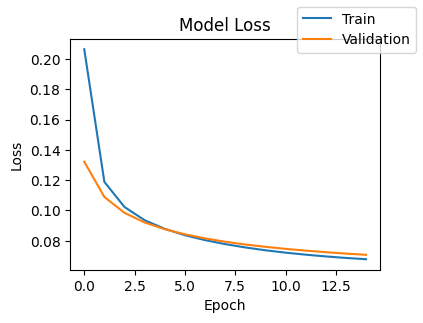

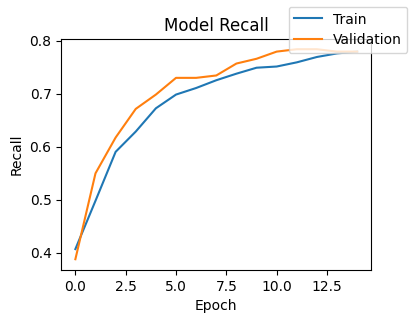

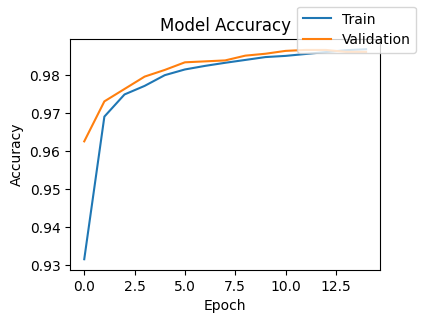

In [28]:
#1 dense layer (30 neurons), relu activation, 15 epochs and 64 batch size, sgd optimizer

tf.keras.backend.clear_session()

model0 = Sequential()
model0.add(Dense(30,activation='relu',input_dim = 40))
model0.add(Dense(1, activation = 'sigmoid'))

model0.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['recall', 'accuracy'])
epochs0 = 15
batch_size0 = 64

start = time.time()

history = model0.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs0,
    batch_size=batch_size0
)

end = time.time()

time0 = end-start

print('*'*100, '\n')
print("Time: ", time0)
print('*'*100, '\n')
train_accuracy_0, val_accuracy_0, train_recall_0, val_recall_0 = recall_accuracy()
print('*'*100, '\n')
plot(history, 'loss'), plot(history,'recall'), plot(history,'accuracy')


# **Model Performance Improvement**

## Model 1

It seems like model0 hasn't finished converging. Therefore, it may be good to add the number of epochs.

Change Optimizer to Adam

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8309 - loss: 0.4238 - recall: 0.5687 - val_accuracy: 0.9765 - val_loss: 0.1008 - val_recall: 0.6171
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9788 - loss: 0.0890 - recall: 0.6341 - val_accuracy: 0.9840 - val_loss: 0.0782 - val_recall: 0.7342
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9847 - loss: 0.0721 - recall: 0.7256 - val_accuracy: 0.9868 - val_loss: 0.0689 - val_recall: 0.7793
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9869 - loss: 0.0646 - recall: 0.7657 - val_accuracy: 0.9883 - val_loss: 0.0638 - val_recall: 0.8063
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9871 - loss: 0.0606 - recall: 0.7756 - val_accuracy: 0.9885 - val_loss: 0.0608 - val_recall: 0.8198
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.0582 - recall: 0.7859 - val_accuracy: 0.9900 - val_loss: 0.0586 - val_recall: 0.8378
Epoc

(None, None, None)

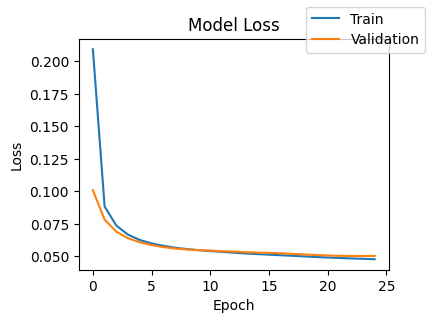

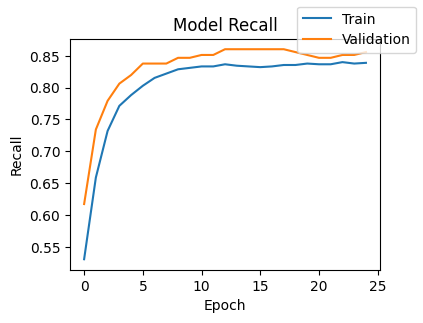

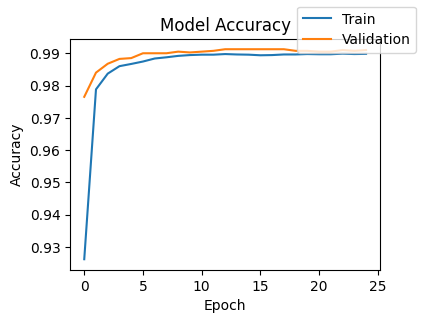

In [29]:
#Increasing epochs from 15 to 25 and changing the optimizer from sgd to Adam
#1 dense layer (30 neurons), relu activation, 25 epochs and 64 batch size, Adam optimizer

tf.keras.backend.clear_session()

model1 = Sequential()
model1.add(Dense(30,activation='relu',input_dim = 40))
model1.add(Dense(1, activation = 'sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['recall', 'accuracy'])
epochs1 = 25
batch_size1 = 64

start = time.time()

history = model1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs1,
    batch_size=batch_size1
)

end = time.time()

time1 = end-start

print('*'*100, '\n')
print("Time: ", time1)
print('*'*100, '\n')
train_accuracy_1, val_accuracy_1, train_recall_1, val_recall_1 = recall_accuracy()
print('*'*100, '\n')
plot(history, 'loss'), plot(history,'recall'), plot(history,'accuracy')

- Changing the optimizer from sgd to adam and increasing the epochs from 15 to 25 made a significant improvement.

## Model 2

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6597 - loss: 1.0010 - recall: 0.7179 - val_accuracy: 0.9743 - val_loss: 0.1056 - val_recall: 0.6036
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.0939 - recall: 0.6284 - val_accuracy: 0.9808 - val_loss: 0.0831 - val_recall: 0.6892
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9821 - loss: 0.0741 - recall: 0.7040 - val_accuracy: 0.9850 - val_loss: 0.0717 - val_recall: 0.7658
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9865 - loss: 0.0646 - recall: 0.7598 - val_accuracy: 0.9868 - val_loss: 0.0652 - val_recall: 0.7883
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9879 - loss: 0.0600 - recall: 0.7850 - val_accuracy: 0.9877 - val_loss: 0.0615 - val_recall: 0.8018
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9885 - loss: 0.0573 - recall: 0.7937 - val_accuracy: 0.9885 - val_loss: 0.0590 - val_recall: 0.8153
Epoc

(None, None, None)

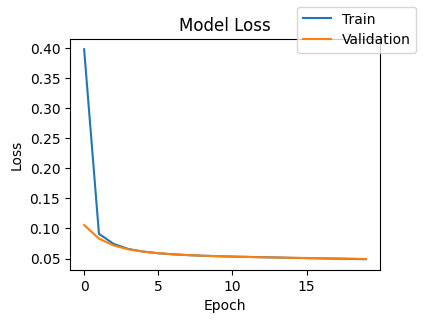

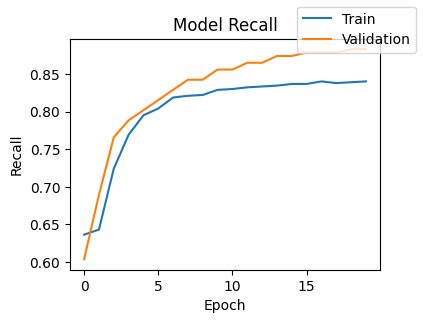

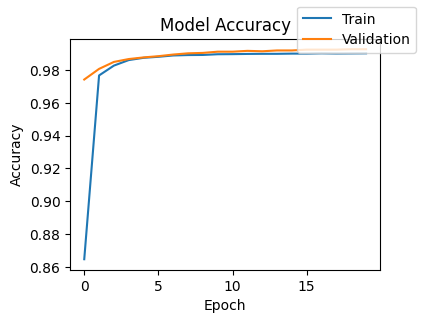

In [30]:
#Introducing early stopping to make the model pick the epoch with best recall
#1 dense layer (30 neurons), relu activation, 25 epochs and 64 batch size, Adam optimizer, and early stopping

tf.keras.backend.clear_session()

early_stop = EarlyStopping(
    monitor='recall',      # what to monitor
    patience=3,              # stop after 3 epochs with no improvement
    restore_best_weights=True
)

model2 = Sequential()
model2.add(Dense(30, activation='relu', input_dim=40))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['recall', 'accuracy'])

epochs2 = 25
batch_size2 = 64

start = time.time()

history = model2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs2,
    batch_size=batch_size2,
    callbacks=[early_stop]
)

end = time.time()

time2 = end-start

print('*'*100, '\n')
print("Time: ", time2)
print('*'*100, '\n')
train_accuracy_2, val_accuracy_2, train_recall_2, val_recall_2 = recall_accuracy()
print('*'*100, '\n')
plot(history, 'loss'), plot(history,'recall'), plot(history,'accuracy')


- Early stopping improved the recall accuracy.

## Model 3

Trying reducing batch size to 32 while keeping early stopping.

Epoch 1/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8145 - loss: 0.4917 - recall: 0.5863 - val_accuracy: 0.9780 - val_loss: 0.0919 - val_recall: 0.6667
Epoch 2/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9795 - loss: 0.0822 - recall: 0.6719 - val_accuracy: 0.9855 - val_loss: 0.0741 - val_recall: 0.7568
Epoch 3/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9856 - loss: 0.0683 - recall: 0.7562 - val_accuracy: 0.9880 - val_loss: 0.0662 - val_recall: 0.8063
Epoch 4/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9876 - loss: 0.0623 - recall: 0.7843 - val_accuracy: 0.9885 - val_loss: 0.0620 - val_recall: 0.8153
Epoch 5/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9885 - loss: 0.0586 - recall: 0.7977 - val_accuracy: 0.9893 - val_loss: 0.0591 - val_recall: 0.8288
Epoch 6/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9888 - loss: 0.0563 - recall: 0.8016 - val_accuracy: 0.9900 - val_loss: 0.0574 - val_recall: 0.8423
Epoc

(None, None, None)

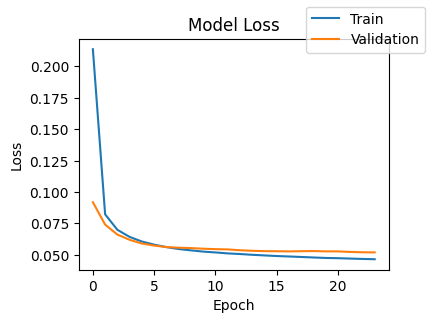

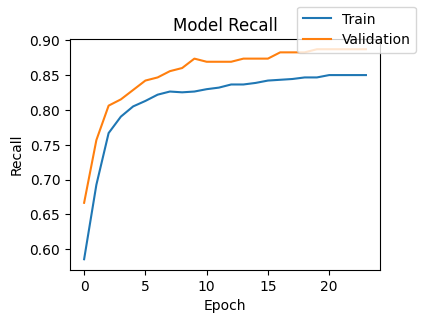

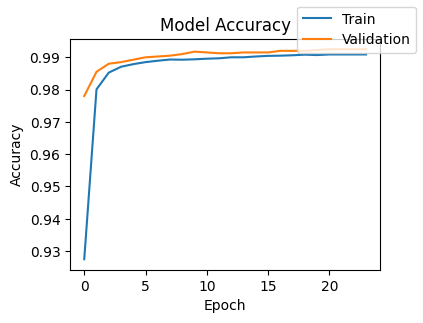

In [31]:
tf.keras.backend.clear_session()

early_stop = EarlyStopping(
    monitor='recall',      # what to monitor
    patience=3,              # stop after 3 epochs with no improvement
    restore_best_weights=True
)

model3 = Sequential()
model3.add(Dense(30, activation='relu', input_dim=40))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['recall', 'accuracy'])

epochs3 = 25
batch_size3 = 32

start = time.time()

history = model3.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs3,
    batch_size=batch_size3,
    callbacks=[early_stop]
)

end = time.time()

time3 = end-start

print('*'*100, '\n')
print("Time: ", time3)
print('*'*100, '\n')
train_accuracy_3, val_accuracy_3, train_recall_3, val_recall_3 = recall_accuracy()
print('*'*100, '\n')
plot(history, 'loss'), plot(history,'recall'), plot(history,'accuracy')

Reducing batch size did not improve the performance.

## Model 4

Returning batch size to 64, but adding one more layer.

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8939 - loss: 0.2695 - recall: 0.2587 - val_accuracy: 0.9795 - val_loss: 0.0870 - val_recall: 0.6712
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9817 - loss: 0.0769 - recall: 0.6849 - val_accuracy: 0.9868 - val_loss: 0.0672 - val_recall: 0.7928
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9865 - loss: 0.0618 - recall: 0.7556 - val_accuracy: 0.9902 - val_loss: 0.0585 - val_recall: 0.8468
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0553 - recall: 0.7842 - val_accuracy: 0.9908 - val_loss: 0.0540 - val_recall: 0.8604
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9896 - loss: 0.0507 - recall: 0.8168 - val_accuracy: 0.9910 - val_loss: 0.0511 - val_recall: 0.8739
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9907 - loss: 0.0473 - recall: 0.8392 - val_accuracy: 0.9918 - val_loss: 0.0497 - val_recall: 0.8874
Epoc

(None, None, None)

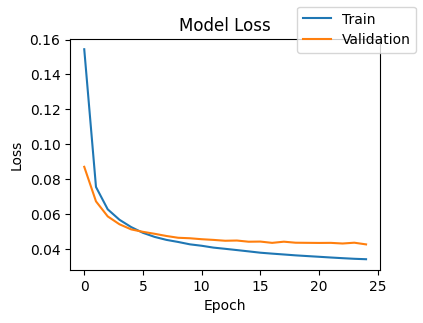

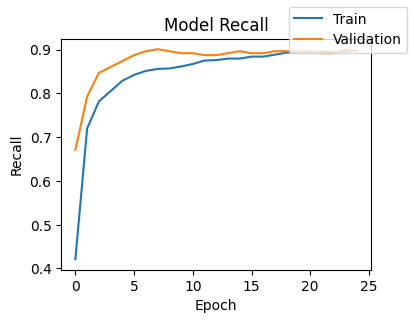

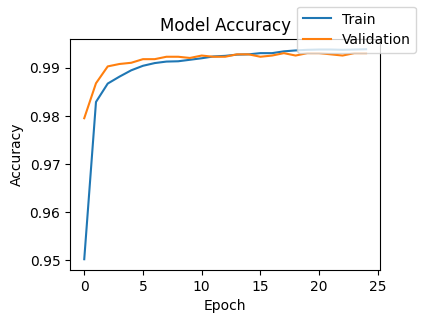

In [32]:
tf.keras.backend.clear_session()

early_stop = EarlyStopping(
    monitor='recall',      # what to monitor
    patience=3,              # stop after 3 epochs with no improvement
    restore_best_weights=True
)

model4 = Sequential()
model4.add(Dense(30, activation='relu', input_dim=40))
model4.add(Dense(20, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['recall', 'accuracy'])

epochs4 = 25
batch_size4 = 64

start = time.time()

history = model4.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs4,
    batch_size=batch_size4,
    callbacks=[early_stop]
)

end = time.time()

time4 = end-start

print('*'*100, '\n')
print("Time: ", time4)
print('*'*100, '\n')
train_accuracy_4, val_accuracy_4, train_recall_4, val_recall_4 = recall_accuracy()
print('*'*100, '\n')
plot(history, 'loss'), plot(history,'recall'), plot(history,'accuracy')

Adding one more layer significantly improved the recall score.

## Model 5

Adding dropout.

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8048 - loss: 0.5477 - recall: 0.3714 - val_accuracy: 0.9725 - val_loss: 0.1058 - val_recall: 0.5225
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9658 - loss: 0.1250 - recall: 0.5318 - val_accuracy: 0.9787 - val_loss: 0.0855 - val_recall: 0.6441
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.1013 - recall: 0.6223 - val_accuracy: 0.9822 - val_loss: 0.0751 - val_recall: 0.7072
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9782 - loss: 0.0887 - recall: 0.6865 - val_accuracy: 0.9850 - val_loss: 0.0674 - val_recall: 0.7477
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0821 - recall: 0.7013 - val_accuracy: 0.9890 - val_loss: 0.0612 - val_recall: 0.8198
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9830 - loss: 0.0767 - recall: 0.7177 - val_accuracy: 0.9898 - val_loss: 0.0570 - val_recall: 0.8243
Epoc

(None, None, None)

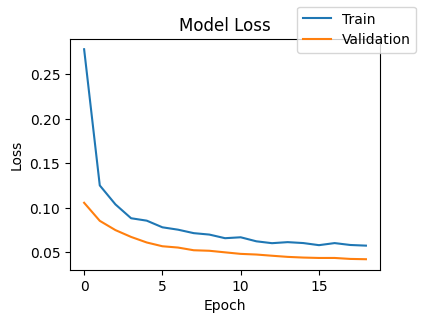

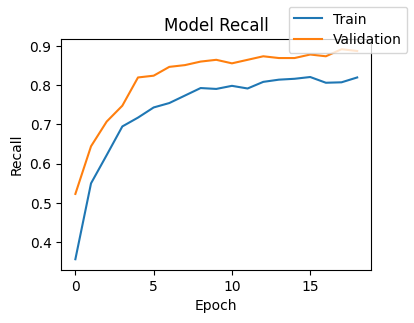

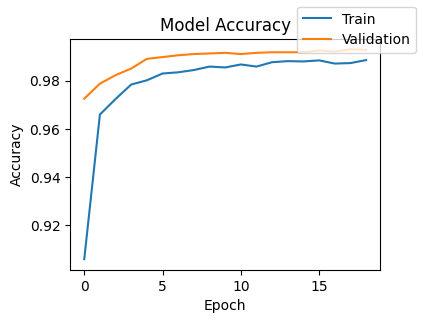

In [33]:
#introducing dropout

tf.keras.backend.clear_session()

early_stop = EarlyStopping(
    monitor='recall',      # what to monitor
    patience=3,              # stop after 3 epochs with no improvement
    restore_best_weights=True
)

model5 = Sequential()
model5.add(Dense(30, activation='relu', input_dim=40))
model5.add(Dropout(0.2))
model5.add(Dense(20, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(1, activation='sigmoid'))

model5.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['recall', 'accuracy'])

epochs5 = 25
batch_size5 = 64

start = time.time()

history = model5.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs5,
    batch_size=batch_size5,
    callbacks=[early_stop]
)

end = time.time()

time5 = end-start

print('*'*100, '\n')
print("Time: ", time5)
print('*'*100, '\n')
train_accuracy_5, val_accuracy_5, train_recall_5, val_recall_5 = recall_accuracy()
print('*'*100, '\n')
plot(history, 'loss'), plot(history,'recall'), plot(history,'accuracy')

The model performance dropped with dropout.

## Model 6

Setting class weights in order to make the model more sensitive in identifying the positive class. This may be important because the dataset is highly imbalanced.

In [34]:
y_train.value_counts(normalize=True)

,proportion
Target,
0.0,0.9445
1.0,0.0555


{0: np.float64(0.5293806246691372), 1: np.float64(9.00900900900901)}
Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8415 - loss: 0.5818 - recall: 0.6153 - val_accuracy: 0.9133 - val_loss: 0.2585 - val_recall: 0.9054
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9321 - loss: 0.2621 - recall: 0.8884 - val_accuracy: 0.9520 - val_loss: 0.1965 - val_recall: 0.9099
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9594 - loss: 0.2220 - recall: 0.8935 - val_accuracy: 0.9688 - val_loss: 0.1665 - val_recall: 0.9144
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9681 - loss: 0.2020 - recall: 0.8999 - val_accuracy: 0.9720 - val_loss: 0.1497 - val_recall: 0.9144
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9699 - loss: 0.1906 - recall: 0.9028 - val_accuracy: 0.9765 - val_loss: 0.1403 - val_recall: 0.9144
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.1810 - recall: 0.907

(None, None, None)

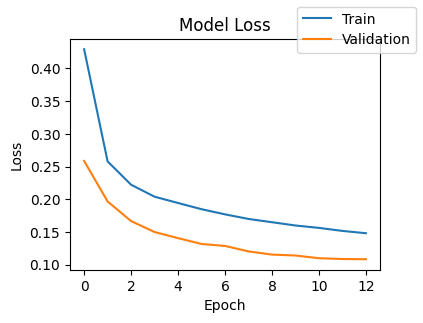

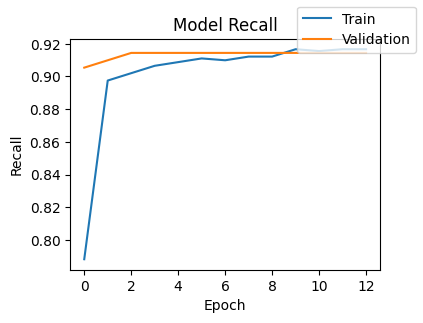

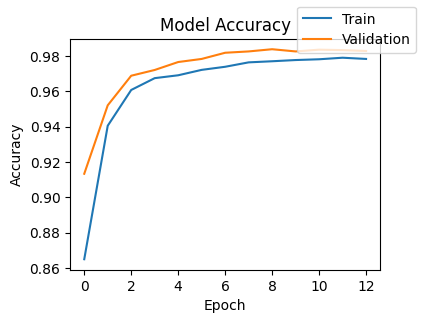

In [35]:
#calculating class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),
    y=y_train
)

class_weights = {0: class_weights[0], 1: class_weights[1]}
print(class_weights)

tf.keras.backend.clear_session()

early_stop = EarlyStopping(
    monitor='recall',      # what to monitor
    patience=3,              # stop after 3 epochs with no improvement
    restore_best_weights=True
)

model6 = Sequential()
model6.add(Dense(30, activation='relu', input_dim=40))
model6.add(Dense(20, activation='relu'))
model6.add(Dense(1, activation='sigmoid'))

model6.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['recall', 'accuracy'])

epochs6 = 25
batch_size6 = 64

start = time.time()

history = model6.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs6,
    batch_size=batch_size6,
    class_weight=class_weights,
    callbacks=[early_stop]
)

end = time.time()

time6 = end-start

print('*'*100, '\n')
print("Time: ", time6)
print('*'*100, '\n')
train_accuracy_6, val_accuracy_6, train_recall_6, val_recall_6 = recall_accuracy()
print('*'*100, '\n')
plot(history, 'loss'), plot(history,'recall'), plot(history,'accuracy')

## Model 7

Epoch 1/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8256 - loss: 0.4390 - recall: 0.8047 - val_accuracy: 0.9327 - val_loss: 0.2412 - val_recall: 0.9189
Epoch 2/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9466 - loss: 0.2429 - recall: 0.8842 - val_accuracy: 0.9513 - val_loss: 0.2015 - val_recall: 0.9189
Epoch 3/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9638 - loss: 0.2120 - recall: 0.9022 - val_accuracy: 0.9585 - val_loss: 0.1893 - val_recall: 0.9189
Epoch 4/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9691 - loss: 0.1934 - recall: 0.9025 - val_accuracy: 0.9588 - val_loss: 0.1787 - val_recall: 0.9189
Epoch 5/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9741 - loss: 0.1828 - recall: 0.9073 - val_accuracy: 0.9613 - val_loss: 0.1666 - val_recall: 0.9189
Epoch 6/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9747 - loss: 0.1724 - recall: 0.9071 - val_accuracy: 0.9638 - val_loss: 0.1619 - val_recall: 0.9189
Epoc

(None, None, None)

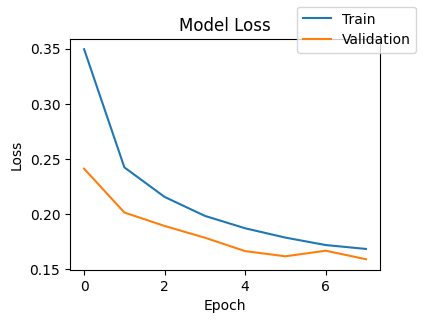

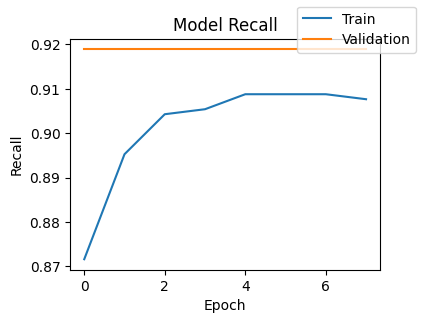

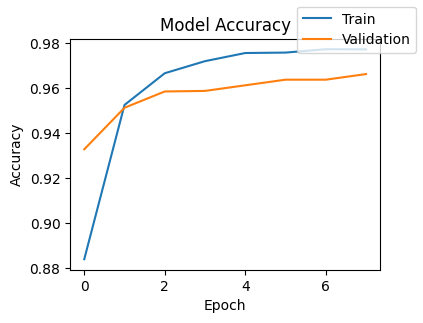

In [36]:
#trying class weights with 32 batch size

tf.keras.backend.clear_session()

early_stop = EarlyStopping(
    monitor='recall',      # what to monitor
    patience=3,              # stop after 3 epochs with no improvement
    restore_best_weights=True
)

model7 = Sequential()
model7.add(Dense(30, activation='relu', input_dim=40))
model7.add(Dense(20, activation='relu'))
model7.add(Dense(1, activation='sigmoid'))

model7.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['recall', 'accuracy'])

epochs7 = 25
batch_size7 = 32

start = time.time()

history = model7.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs7,
    batch_size=batch_size7,
    callbacks=[early_stop],
    class_weight=class_weights
)

end = time.time()

time7 = end-start

print('*'*100, '\n')
print("Time: ", time7)
print('*'*100, '\n')
train_accuracy_7, val_accuracy_7, train_recall_7, val_recall_7 = recall_accuracy()
print('*'*100, '\n')
plot(history, 'loss'), plot(history,'recall'), plot(history,'accuracy')

This model with reduced batch size takes twice as long to run as compared to model6, but did not improve the recall score.

# **Model Performance Comparison and Final Model Selection**

Now, in order to select the final model, we will compare the performances of all the models for the training and validation sets.

In [37]:
scores = {'batch_size': (batch_size0, batch_size1, batch_size2, batch_size3, batch_size4, batch_size5, batch_size6, batch_size7),
          'epochs': (epochs0, epochs1, epochs2, epochs3, epochs4, epochs5, epochs6, epochs7),
          'optimizer': ('SGD', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam'),
          'early_stopping': ('No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'),
          'input_layers': ('1', '1', '1', '1', '2', '2', '2', '2'),
          'drop_out': ('No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No'),
          'class_weight': ('No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes'),
          'train_accuracy': (train_accuracy_0, train_accuracy_1, train_accuracy_2, train_accuracy_3, train_accuracy_4, train_accuracy_5, train_accuracy_6, train_accuracy_7),
          'val_accuracy': (val_accuracy_0, val_accuracy_1, val_accuracy_2, val_accuracy_3, val_accuracy_4, val_accuracy_5, val_accuracy_6, val_accuracy_7),
          'train_recall': (train_recall_0, train_recall_1, train_recall_2, train_recall_3, train_recall_4, train_recall_5, train_recall_6, train_recall_7),
          'val_recall': (val_recall_0, val_recall_1, val_recall_2, val_recall_3, val_recall_4, val_recall_5, val_recall_6, val_recall_7),
          'Time': (time0, time1, time2, time3, time4, time5, time6, time7)}
scores = pd.DataFrame(scores, index=['model0', 'model1', 'model2', 'model3', 'model4', 'model5', 'model6', 'model7'])
scores


,batch_size,epochs,optimizer,early_stopping,input_layers,drop_out,class_weight,train_accuracy,val_accuracy,train_recall,val_recall,Time
model0,64,15,SGD,No,1,No,No,0.986687,0.98600,0.779279,0.779279,11.023358
model1,64,25,Adam,No,1,No,No,0.989812,0.99100,0.838964,0.855856,17.611191
model2,64,25,Adam,Yes,1,No,No,0.990250,0.99275,0.840090,0.882883,14.843495
model3,32,25,Adam,Yes,1,No,No,0.990875,0.99250,0.850225,0.887387,30.056691
model4,64,25,Adam,Yes,2,No,No,0.993813,0.99300,0.897523,0.896396,19.590731
model5,64,25,Adam,Yes,2,Yes,No,0.988500,0.99275,0.819820,0.887387,16.438328
model6,64,25,Adam,Yes,2,No,Yes,0.978250,0.98275,0.916667,0.914414,11.028268
model7,32,25,Adam,Yes,2,No,Yes,0.977250,0.96625,0.907658,0.918919,11.631568


- In model0, I started with batch size 64, epoc 15 and sgd optimizer and got 77.9% recall accuracy.
- In model1, I increased the Epochs to 25 and used adam optimizer. These changes significantly improved recall accuracy to 85.58%.
- In model2, I added early stopping in order for the model to pick the epoch with recall rate. This improved the recall to 88.28.
- In model3, I tried 32 batch size. This improved the recall accuracy a little bit to 88.73.
- In model4, I returned to 64 batch size, but introdueced a second dense layer. This increased the recall to 89.63. Therefore, I decided to keep the 2 dense middle layers going forward.
- In model5, I introduced dropout, but the recall came down to 88.73.
- In model6, I tried class weight and got a 91.44 recall rate.
- In model7, I used the same setting as model 6, but with reduced batch size. model7 improved the recall accuracy a little bit, to 91.89. However, model7 takes longer to run.


I selected **model6** as my final model for the following reasons.
1. model6 in the top 2 recall scores, with 91.44% validation recall.
2. The fact that it implements class weights gives me confidence that it is robust enough to identify the minority class more easily with unseen data.
3. model6 uses 25 epochs, 64 batch size, 2 hidden layers (30 and 20 neurons) with Relu activation, Adam optimizer, early stopping, and class weights. It takes about 11 seconds to run.
3. Although model7 has a slightly higher validation recall score, it has half the size of the batch size used with model6. The improvement that model7 offers is not significant enough to warrant reducing the batch size by half.




Now, let's check the performance of the final model on the test set.

In [38]:
y_test_pred_proba = model6.predict(X_test).ravel()

y_test_pred = (y_test_pred_proba >= 0.5).astype(int)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

acc = accuracy_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

print("Test Accuracy:", acc)
print("Test Recall:", rec)
print("Test Precision:", prec)
print("Test F1 Score:", f1)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Test Accuracy: 0.9802
Test Recall: 0.8652482269503546
Test Precision: 0.8
Test F1 Score: 0.8313458262350937


- The test recall score reduced a little bit, but I think it is still a resonably good prediction.

# **Actionable Insights and Recommendations**

Write down some insights and business recommendations based on your observations.

1. The data provided is unlabelled data making it challenging to understand trends and relationships among variables. In addition, the data seems scaled. Although it makes the data analysis easy, it may be useful to work with the original data in the future.
2. Recall is chosen as the model selection so that our model focuses on identifying possible failure modes.
3. The chosen model, model4, has 90% recall score on the validation set and 86.5% recall score on the test set. This model will allow us to identify more than 80% of failure modes, helping the company to repair generators beore they break. This will allow the company to reduce overall maintenance cost.
4. On the other hand, with this model, we will still be missing about 14% of failure modes. Therefore, there is room for improvement. I recommend to retrain the model with more data in the future.
5. I recommend monitoring the performance of the model and adjusting as needed after the model is implemented.